In [1]:
#Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Machine learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

Text(0.5, 1.0, ' Logistic Function ')

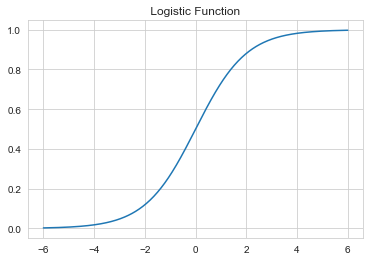

In [26]:
#Logistic Function
def logistic(t):
    return 1.0/(1+math.exp((-1.0)*t))

# Set t from -6 to 6 (500 elements, linearly spaced)
t= np.linspace(-6,6,500)

# Set up y values
y= np.array([logistic(ele) for ele in t])

#Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

In [27]:
df = sm.datasets.fair.load_pandas().data

In [28]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [29]:
def affair_check(x):
    if x !=0:
        return 1
    else:
        return 0

In [30]:
df['Had_Affair']=df['affairs'].apply(affair_check)

In [31]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'Had_Affair'],
      dtype='object')

In [32]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


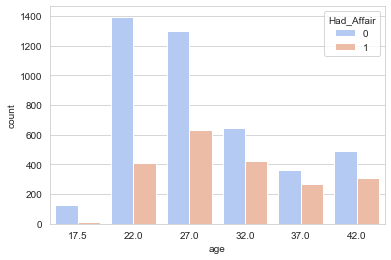

In [33]:
sns.countplot(x='age', data=df, hue='Had_Affair', palette ='coolwarm')

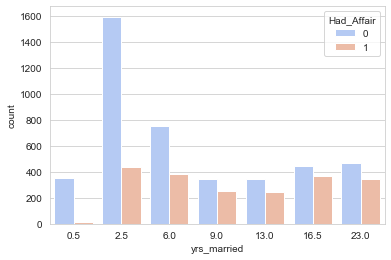

In [34]:
sns.countplot('yrs_married', data=df, hue='Had_Affair', palette='coolwarm')

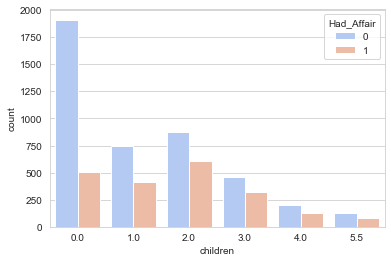

In [35]:
sns.countplot('children', data=df, hue='Had_Affair', palette='coolwarm')

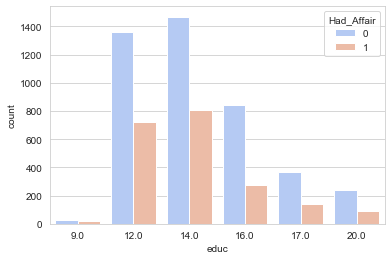

In [36]:
sns.countplot('educ', data=df, hue='Had_Affair', palette='coolwarm')

In [37]:
#Create new DataFrames for the Categorical Variables
occ_dummies= pd.get_dummies(df['occupation'])
hus_occ_dummies= pd.get_dummies(df['occupation_husb'])

In [38]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [39]:
occ_dummies.columns=['occ1', 'occ2', 'occ3','occ4','occ5','occ6']
hus_occ_dummies.columns=['hocc1', 'hocc2', 'hocc3','hocc4','hocc5','hocc6']

In [40]:
X = df.drop(['occupation','occupation_husb', 'Had_Affair'], axis=1)

In [41]:
dummies= pd.concat([occ_dummies, hus_occ_dummies], axis=1)

In [42]:
X = pd.concat([X, dummies], axis=1)

In [43]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [44]:
Y = df.Had_Affair

In [45]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [46]:
#Dropping one columns of each dummy cariable set to avoid multicollinearity
X = X.drop('occ1', axis=1)
X = X.drop('hocc1', axis=1)

In [48]:
X= X.drop('affairs', axis=1)

In [50]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [53]:
Y = np.ravel(Y)

In [56]:
log_model = LogisticRegression()

#Fit out data
log_model.fit(X,Y)

#Check our accuracy
log_model.score(X,Y)

c:\users\petar lovric\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7243166823751178

In [58]:
#Check percentage of woman that had affairs
Y.mean()

0.3224945020420987

In [62]:
coeff_df=DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [63]:
coeff_df

,0,1
0,rate_marriage,[-0.6955315598905288]
1,age,[-0.056386727500591996]
2,yrs_married,[0.10385791733824538]
3,children,[0.01430642412946018]
4,religious,[-0.3494691436188934]
5,educ,[0.010491305232251903]
6,occ2,[0.30695798785409234]
7,occ3,[0.6579910735220311]
8,occ4,[0.41198261539282305]
9,occ5,[0.8923124176193222]


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [65]:
log_model2 = LogisticRegression()

log_model2.fit(X_train, Y_train)

c:\users\petar lovric\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
class_predict= log_model2.predict(X_test)

In [68]:
print(metrics.accuracy_score(Y_test, class_predict))

0.7305276381909548
